## 基本的なグラフのプロット方法　seaborn

**1．折れ線グラフ**<br>
sns.lineplot(x="", y="", kind="line", data=df)

**2．棒グラフ**<br>
sns.barplot(x="", y="", data=df)

**3．散布図**<br>
sns.scatterplot(x="", y="", data=df)

**4．ヒストグラム**<br>
sns.distplot(x, bins=20, kde=False, rug=True)

**5．相関行列**<br>
sns.pairplot(df)

**6．箱ひげ図**<br>
sns.boxplot(x=df[""])

**7．バイオリンプロット**<br>
sns.violinplot(x="", y="",data=df)

**8．ヒートマップ**<br>
sns.heatmap(df)

---
### 1．折れ線グラフ

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# データセット読み込み・データ加工
beer_recipe = pd.read_csv('../data/recipeData.csv', index_col=0)

#元データ
beer_recipe.head(5)

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


### 1．折れ線グラフ
今回は適切な「推移」データが存在しないためrandomサンプルデータで描画する

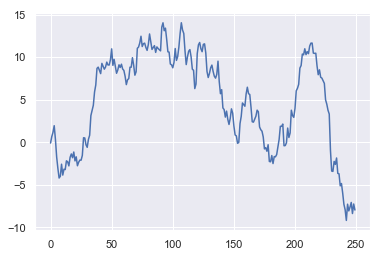

In [2]:
# テストデータ作成
values=np.cumsum(np.random.randn(250,1))
# 基本はplotするだけ
ax = sns.lineplot(data=values)

### 2．棒グラフ
項目ごとの比較に使用する<br>
項目が多すぎるとグラフが煩雑になるので工夫が必要<br>
項目名が長い文字列の場合は、下記のように横向きのグラフが見やすくなる

Text(0,0.5,'Style')

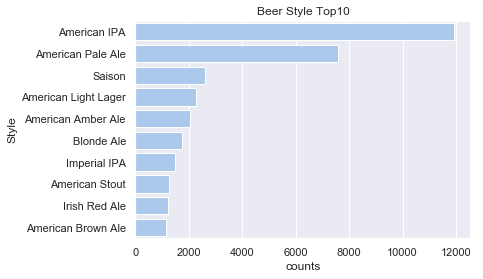

In [3]:
# データ紹介使用したビールのスタイルから上位10 Styleをグラフ化
obj = beer_recipe['Style'].value_counts()
obj.columns = ['counts']

# 上位10位のStyle多い方が上に来るように並び替え
obj10 = obj.head(10)
df = obj10.reset_index()

# 図のサイズはfigsize=()で指定できる。
fig, ax = plt.subplots(figsize=(6, 4))

# ここでは色の指定とplotにのみ、snsを使う。
# 色調を指定。ここではpastelカラーxブルー→パステルブルー
sns.set_color_codes('pastel')

# x軸に項目目、y軸に値をセットすることで横向きになる
# matplotlibとは書き方が異なるので注意
sns.barplot(x='Style',y='index', color="b", data=df)

ax.set_title('Beer Style Top10')
ax.set_xlabel('counts')
ax.set_ylabel('Style')

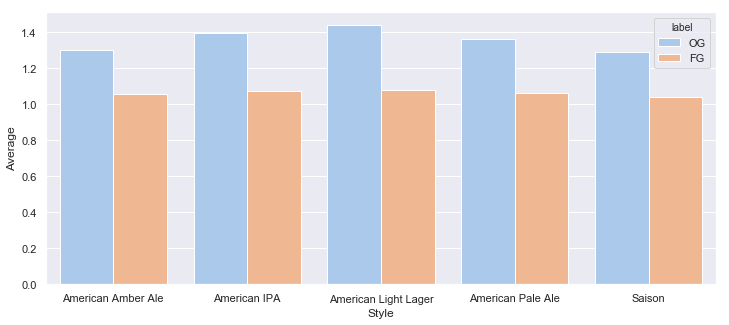

In [4]:
top5 = list(obj.head(5).index)

# Top5のレシピデータセット
comp_data = beer_recipe.query('Style in @top5')

# 比較したい2項目にして、groupby
comp_mean = comp_data.groupby('Style').mean()

# Seabornの場合は多少データ整形が必要
comp_value = comp_mean[['OG','FG']].stack()
df = pd.DataFrame(comp_value)
df = df.reset_index()
df.columns = ['Style','label','Average']

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Style',y='Average', data=df, hue='label',palette="pastel")

### 3．散布図
２値間の相関を見るのによく用いられる<br>
今回のデータでは、2つのStyleの苦味とアルコール度数の間に相関があるかどうかをプロットする

Text(0.5,1,'IBU vs ABV')

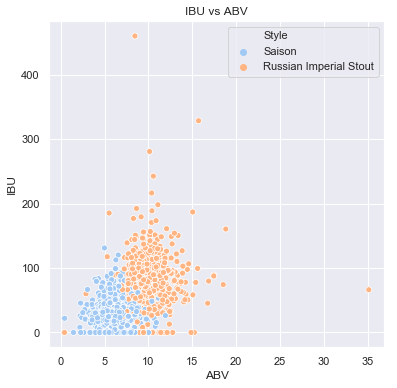

In [5]:
# Russian Imperial Stout とSaisonのデータを使用
# Dataframeを入れてxとyを指定すればよいので書き方がシンプル
beer_recipe1 = beer_recipe.query('Style == "Russian Imperial Stout" or Style == "Saison"')

fig, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(x='ABV', y='IBU', data=beer_recipe1, hue='Style',palette="pastel");
ax.set_title('IBU vs ABV')

---
外れ値が多く、見たい箇所が見えない → 値の分布をそれぞれ確認してみる必要がある

### 4．ヒストグラム
統計で用いられるグラフの一つ、横軸に階級、縦軸に度数をとる

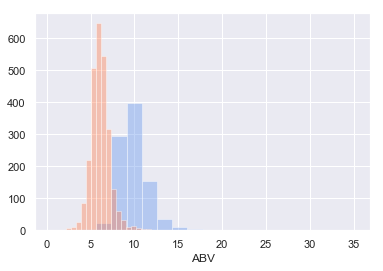

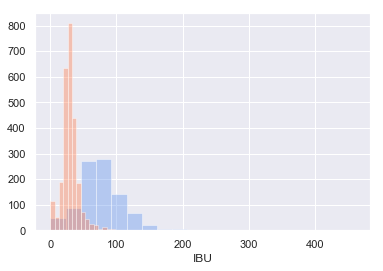

In [7]:
n_bins = 20
# ヒストグラムも同じくデータ整形
beer_recipe1 = beer_recipe.query('Style == "Russian Imperial Stout" or Style == "Saison"')

# ヒストグラムについても、書き方がmatplotlibとかなり異なる
# 更に、2変数のヒストグラム作成は少し工夫が必要
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(beer_recipe1[beer_recipe1["Style"] == "Russian Imperial Stout"].ABV, bins=n_bins, kde=False, color='cornflowerblue')
sns.distplot(beer_recipe1[beer_recipe1["Style"] == "Saison"].ABV, bins=n_bins, kde=False, color='coral')

fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(beer_recipe1[beer_recipe1["Style"] == "Russian Imperial Stout"].IBU, bins=n_bins, kde=False, color='cornflowerblue')
sns.distplot(beer_recipe1[beer_recipe1["Style"] == "Saison"].IBU, bins=n_bins, kde=False, color='coral')

Text(0.5,1,'IBU histgram')

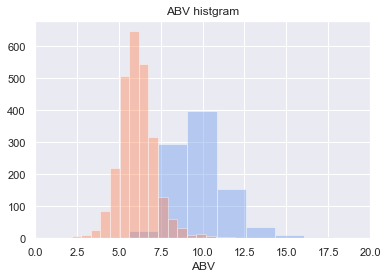

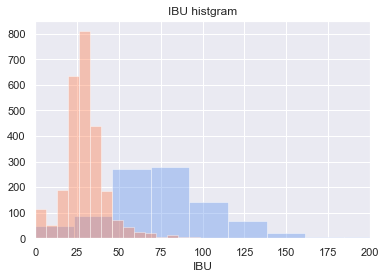

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(beer_recipe1[beer_recipe1["Style"] == "Russian Imperial Stout"].ABV, bins=n_bins, kde=False, color='cornflowerblue')
sns.distplot(beer_recipe1[beer_recipe1["Style"] == "Saison"].ABV, bins=n_bins, kde=False, color='coral')
ax.set_xlim(0, 20)
ax.set_title('ABV histgram')

fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(beer_recipe1[beer_recipe1["Style"] == "Russian Imperial Stout"].IBU, bins=n_bins, kde=False, color='cornflowerblue')
sns.distplot(beer_recipe1[beer_recipe1["Style"] == "Saison"].IBU, bins=n_bins, kde=False, color='coral')
ax.set_xlim(0, 200)
ax.set_title('IBU histgram')

---
### 5. 相関行列
変数のペアの相関関係を1枚で表した図<br>
対角線は、ヒストグラムになっていて各変数の分布も同時に確認ができる<br>
matplotlibでは作成が大変だが、seabornだと1行できれいな見た目の相関行列が作成できる

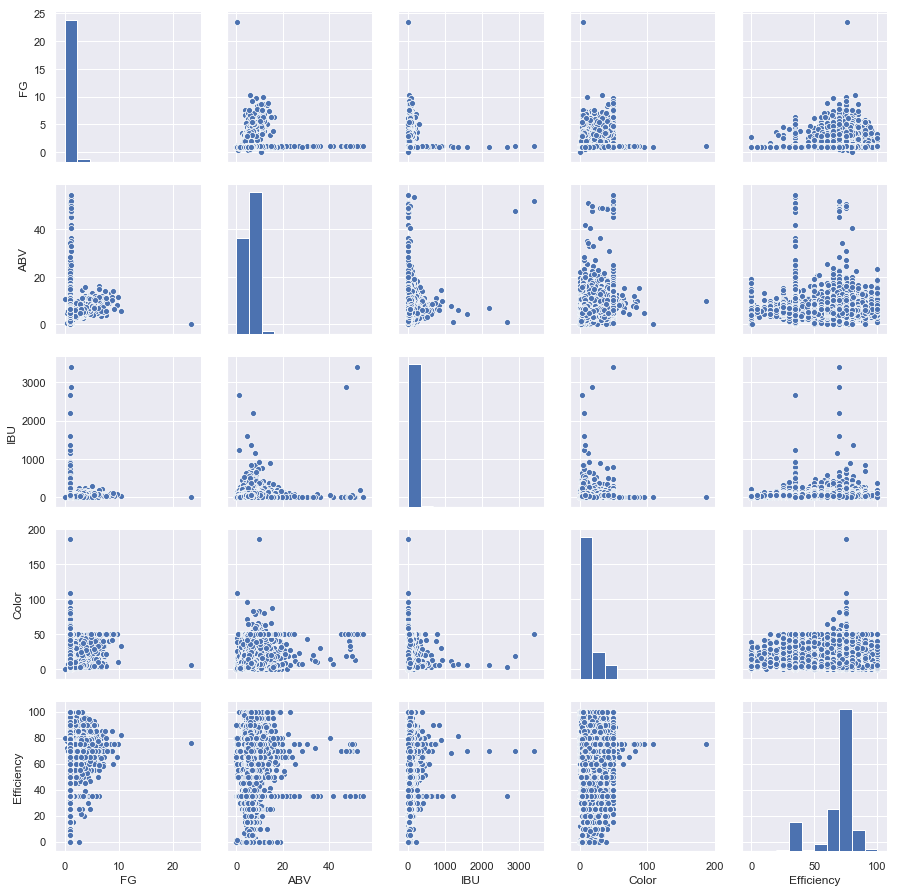

In [9]:
import seaborn as sns
expl = beer_recipe[['FG','ABV','IBU','Color','Efficiency']]
# 相関行列描写
sns.pairplot(expl)
plt.show()

### 6. 箱ひげ図

Text(0.5,1,'IBU boxplot')

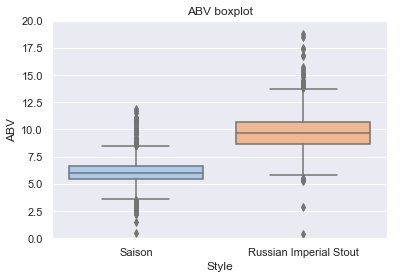

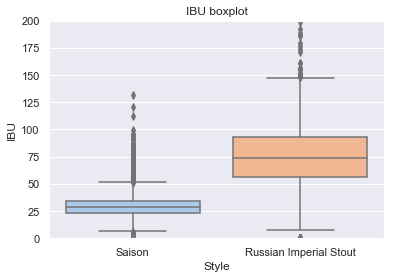

In [10]:
# データ整形
beer_recipe1 = beer_recipe.query('Style == "Russian Imperial Stout" or Style == "Saison"')

# 箱ひげ図プロット
# 箱ひげ図も、散布図同様Dataframeを入れてxとyを指定すればよいので書き方がシンプル
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='Style',y='ABV', data=beer_recipe1,palette="pastel")
ax.set_ylim(0, 20)
ax.set_title('ABV boxplot')

fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='Style',y='IBU', data=beer_recipe1,palette="pastel")
ax.set_ylim(0, 200)
ax.set_title('IBU boxplot')

### 7. バイオリンプロット

C:\Users\ayaka_n\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'IBU violinplot')

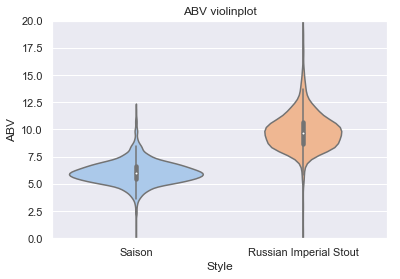

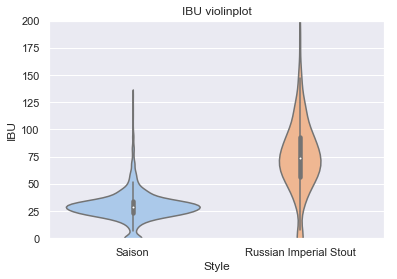

In [11]:
# バイオリンプロットは、Seabornの方が見た目が良いのでオススメ
fig, ax = plt.subplots(figsize=(6,4))
sns.violinplot(x='Style',y='ABV', data=beer_recipe1,palette="pastel")
ax.set_ylim(0, 20)
ax.set_title('ABV violinplot')

fig, ax = plt.subplots(figsize=(6,4))
sns.violinplot(x='Style',y='IBU', data=beer_recipe1,palette="pastel")
ax.set_ylim(0, 200)
ax.set_title('IBU violinplot')

### 8. ヒートマップ

                  FG       ABV       IBU     Color  Efficiency
FG          1.000000  0.028299  0.024343  0.019804    0.030810
ABV         0.028299  1.000000  0.419430  0.358258    0.035682
IBU         0.024343  0.419430  1.000000  0.110506   -0.052645
Color       0.019804  0.358258  0.110506  1.000000   -0.079210
Efficiency  0.030810  0.035682 -0.052645 -0.079210    1.000000


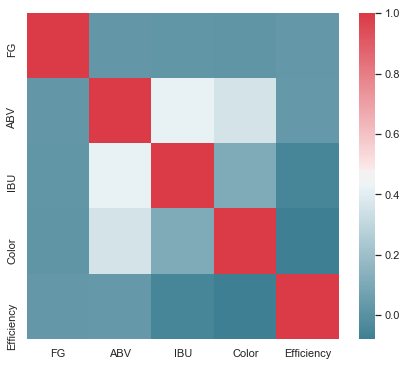

In [12]:
correlation_matrix = expl[:500].corr()
print(correlation_matrix)
#カラーマップの作成
fig, ax = plt.subplots(figsize=(7,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation_matrix, cmap=cmap)